In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, f1_score
from lightgbm import LGBMClassifier, plot_importance
import shap

import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['font.family']= 'AppleGothic' 
matplotlib.rcParams['font.size']= 15
matplotlib.rcParams['axes.unicode_minus'] = False

### 1. Load Dataset

In [3]:
cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=220)

### 2. Fit Model

In [7]:
model = LGBMClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3, verbosity = -1)

In [8]:
model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, n_estimators=400, verbosity=-1)

In [9]:
y_pred = model.predict(X_test)

In [10]:
confusion = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print(confusion)
print()
print(f1)

[[41  3]
 [ 0 70]]

0.9790209790209791


### 3. XAI 확인

#### 3-1. Feature Importance

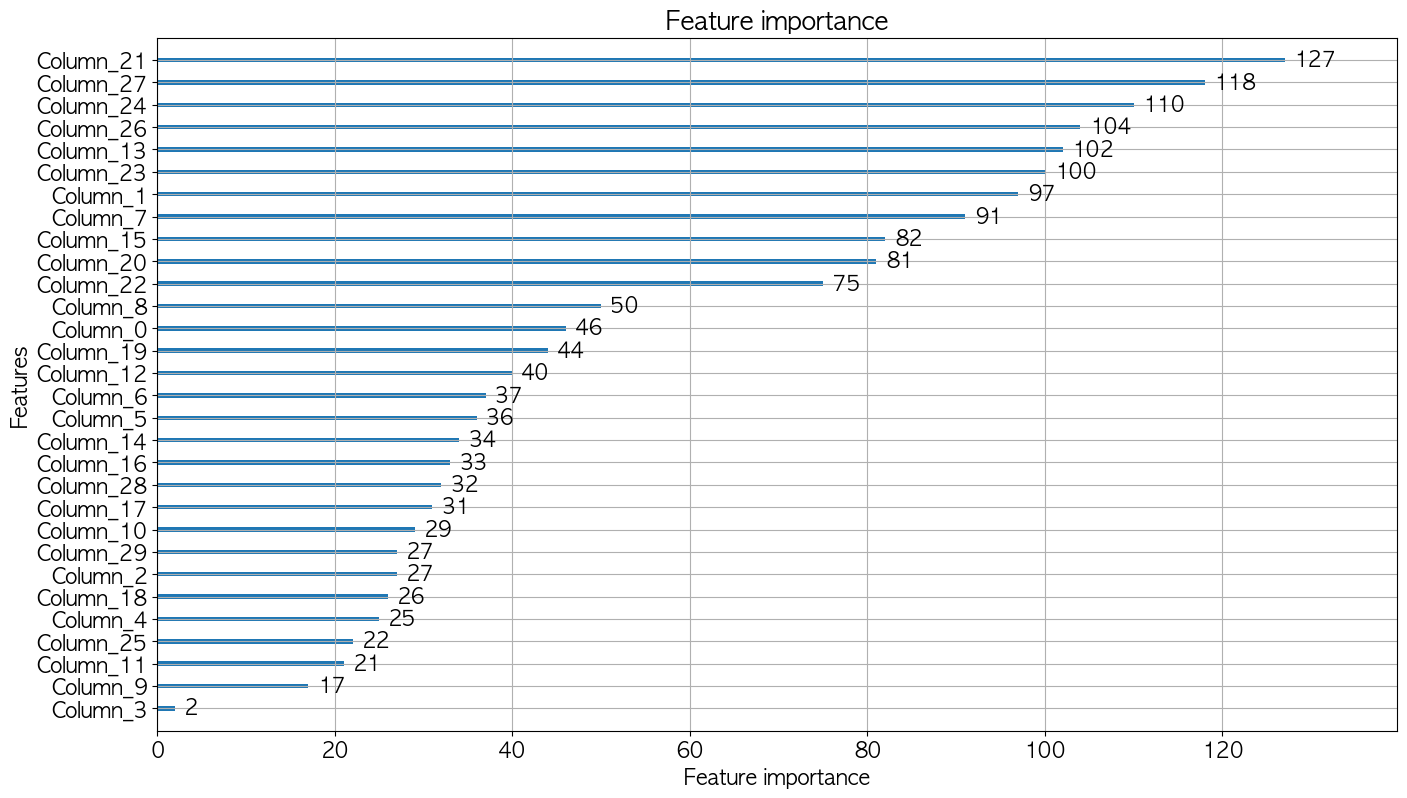

In [12]:
# 특성 중요도
plot_importance(model, figsize=(16, 9))
plt.show()

#### 3-2. SHAP

In [13]:
# Tree model Shap Value 확인 객체 지정
explainer = shap.TreeExplainer(model)

# Shap Values 계산
shap_values = explainer.shap_values(X_test)

/Users/leesanghyuk/anaconda3/envs/PySang/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


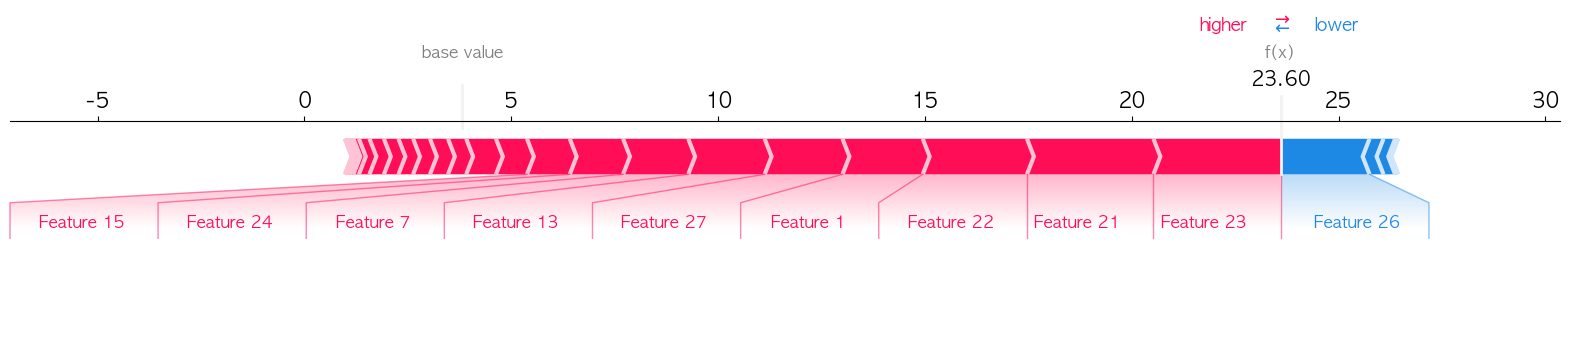

In [22]:
shap.plots.force(explainer.expected_value, shap_values[0], matplotlib=True)

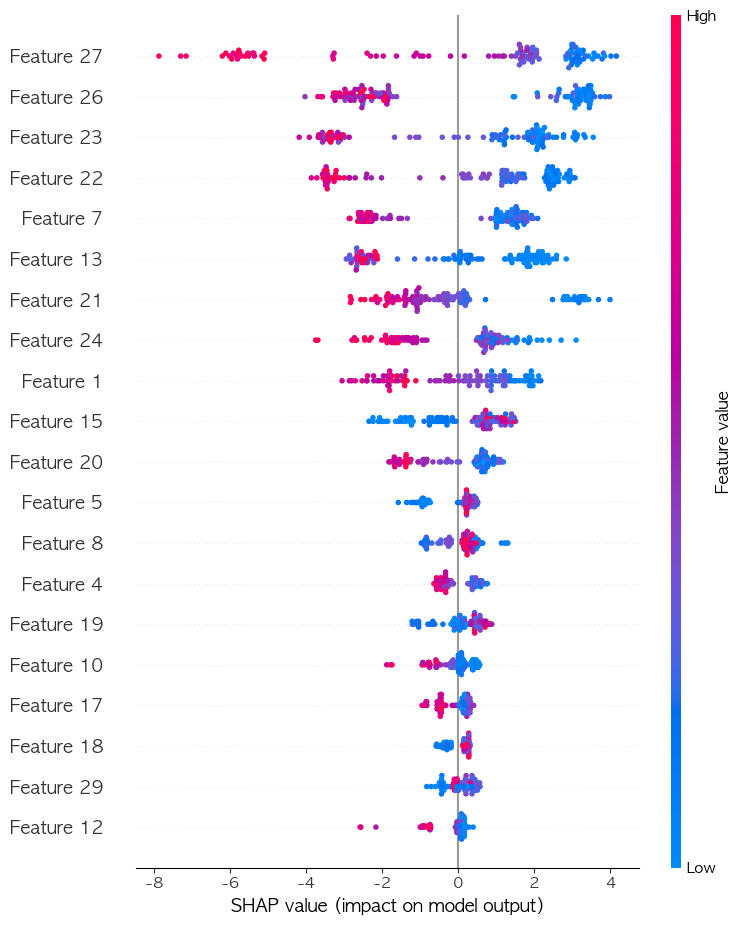

In [30]:
# summary
shap.summary_plot(shap_values, X_test)

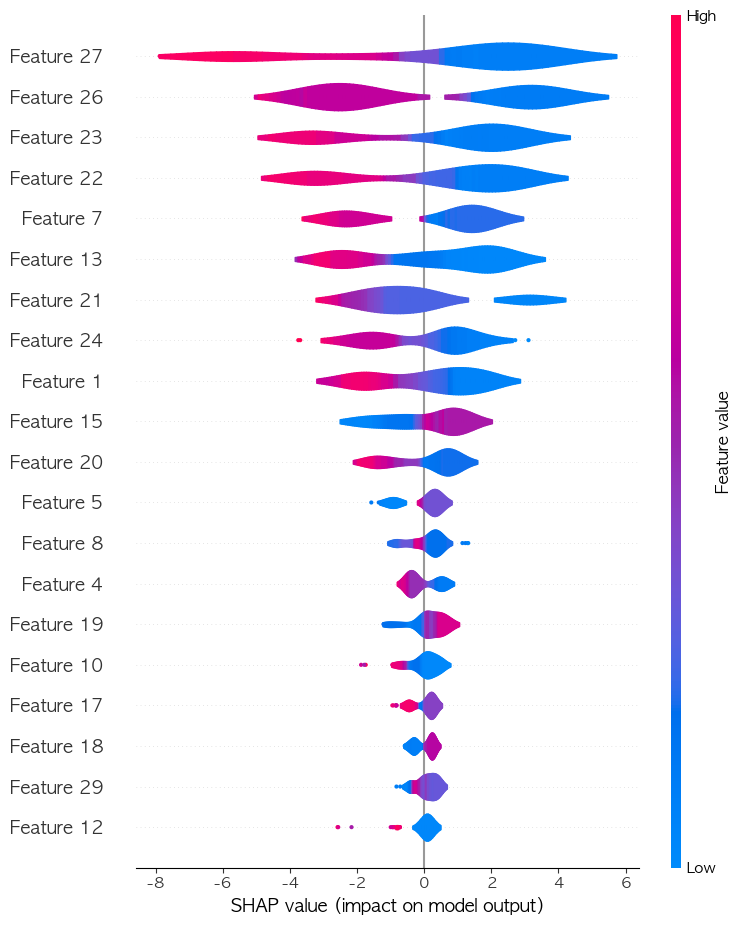

In [21]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_test, plot_type = "violin")

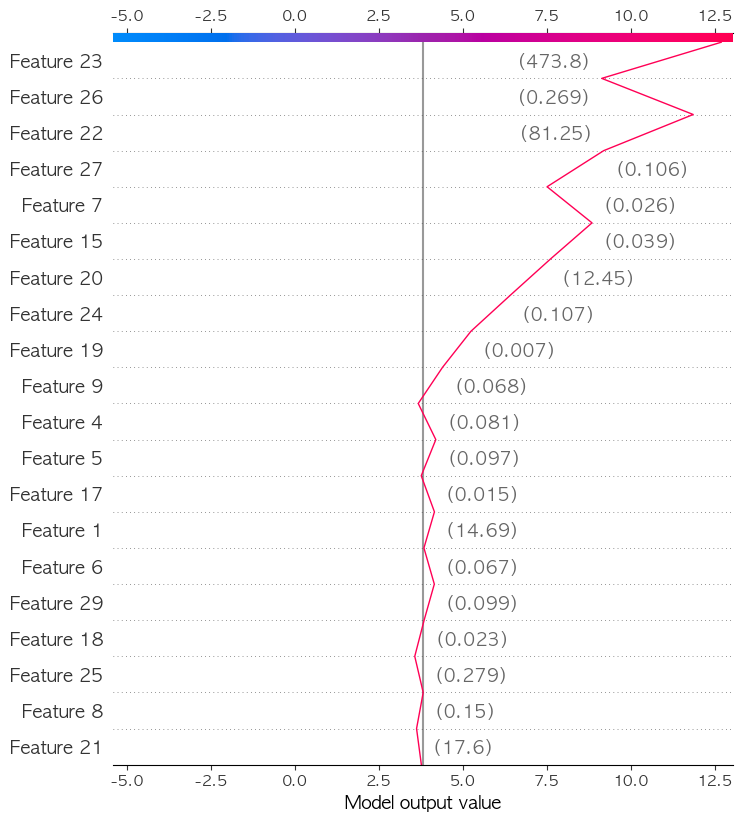

In [32]:
shap.decision_plot(
    explainer.expected_value,  # 다중 클래스일 경우 클래스 1의 기대값
    shap_values[1],               # 클래스 1에 대한 SHAP 값
    X_test                        # 전체 데이터
)